<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_maze_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>

# Labirintus generálás és megoldás pythonnal.

https://klajosw.blogspot.com/

https://github.com/klajosw/

---

--- 

A két fő megszorítás az, hogy legyen egy út a bejárattól a kijáratig, és szórakoztatónak kell lennie, ha a labirintust ceruzával, papírral és az agyi erővel oldja meg, nem túl könnyű, de nem is lehetetlen.

Ahogy egy számítógépes labirintus modellezésére gondolok, úgy tűnik, hogy a grafikon lesz a megfelelő modell:
a grafikon a rács négyzete, a grafikon szélei pedig a szomszédos négyzetek közötti nyílások. 

Tehát a grafikon milyen tulajdonságai eredményeznek jó labirintust


- A bejárattól a kijáratig vezető útnak kell lennie.
- Nem lehet túl sok ilyen út; talán a legjobb, ha csak egy van.
- Valószínűleg a gráfot külön-külön össze kell kapcsolni, nem lehetnek olyan négyzet-szigetek, amelyek a kezdetektől elérhetetlenek. Valójában talán pontosan egy utat akarunk a két négyzet között.
- Az útnak sok csavarral kell rendelkeznie; túl könnyű lenne, ha többnyire egyenes.

Tudom, hogy a fa ezen tulajdonságokkal rendelkezik az utolsó kivételével. 

Tehát a célom így módosult: Helyezzünk a fát egy rácsra, amely minden négyzetet lefed, és ellenőrizzük, hogy az ösvények csavarodnak-e.  

Így tegyem meg:

- Indítsa el a szélek nélküli rácsot (minden négyzetet mindkét oldalán falak vesznek körül).
- A bal felső sarokban és a jobb alsó sarokban adja hozzá a széleket (azaz le kell falakat) a bejárathoz.
- Helyezze a fa gyökerét valamilyen négyzetre.
- Ezután ismételje meg, amíg a fa nem fedezi az egész rácsot:
   * Válasszon ki egy csomópontot a fában.
   * Véletlenszerűen válassza ki a szomszédot, amelyet még nem adtak hozzá a fához.
   * Adjon hozzá egy szélt (leüt a falon) a csomóponttól a szomszédhoz.
  

Az alábbi példában az A gyökér a bal felső sarokban van, és két ága van, Az "A-B-C-D" és az "A-b-c-d" véletlenszerűen választottak (nos, valójában nem véletlenszerűen; ugyanazt a labirintust kezdenek létrehozni):

     o  o--o--o--o--o--o--o--o--o--o
     | A  b  c|  |  |  |  |  |  |  |
     o  o--o  o--o--o--o--o--o--o--o
     | B|  | d|  |  |  |  |  |  |  |
     o  o--o--o--o--o--o--o--o--o--o
     | C  D|  |  |  |  |  |  |  |  |
     o--o--o--o--o--o--o--o--o--o--o
     |  |  |  |  |  |  |  |  |  |  |
     o--o--o--o--o--o--o--o--o--o--o
     |  |  |  |  |  |  |  |  |  |  |
     o--o--o--o--o--o--o--o--o--o  o


---
    
Ezután kiválasztom a "d" csomópontot, és kiterjesztem az "e" -re 
(ezen a ponton nincsenek elérhető szomszédok, tehát az "e" -et a jövőben nem választjuk meg), 

majd a "D" -et választom, és onnan kiterjesztem az összes az "N" módhoz, minden lépésben kiválasztva az éppen hozzáadott csomópontot:

     o  o--o--o--o--o--o--o--o--o--o
     | A  b  c|  |  |  |  |  |  |  |
     o  o--o  o--o--o--o--o--o--o--o
     | B| e  d|  | N|  |  |  |  |  |
     o  o--o--o--o  o--o--o--o--o--o
     | C  D|  |  | M|  |  |  |  |  |
     o--o  o--o--o  o--o--o--o--o--o
     | F  E|  | K  L|  |  |  |  |  |
     o  o--o--o  o--o--o--o--o--o--o
     | G  H  I  J|  |  |  |  |  |  |
     o--o--o--o--o--o--o--o--o--o  o
     
Folytassa így, amíg a rács minden négyzetét hozzáadja a fához. Ezen a ponton lesz egy út a kezdetektől a célokig. Néhány falak megmaradnak; néhányat leütönek.



---

# Véletlenszerű fák készítése

A következő végrehajtási döntéseket hozom:

- A fa élek halmaza.
- Az „él” egy csomópont két csomópontból. Az élek kétirányúak, így a félreértés elkerülése érdekében mindig a rendezett sorrendben fogjuk megkapni: mindig `(A, B)`, soha `(B, A)`. A „szél” kivitelező ezt kényszeríti.
- A fában lévő csomópont bármi lehet: szám, betű, ... Ebben a jegyzetfüzetben fákat készítünk, ahol a csomópontok négyzet alakban vannak egy rácsban, de a "random_tree" függvény bármilyen típusú csomópontot elfogad.
- A "random_tree (csomópontok, szomszédok, pop)" algoritmus a következőképpen működik:
  * Az érvek:
    - "csomópontok": csomópontok gyűjteménye.
    - "szomszédok": olyan funkció, hogy a "szomszédok (csomópont)" egy csomópontkészletet ad vissza.
    - "pop": olyan funkció, hogy a "pop (frontier)" eltávolítja és visszatér egy elemet a "határról".
  * A funkció három gyűjteményt nyomon követi:
    - "fa": a fa éleinek halmaza.
    - "csomópontok": azon csomópontok halmaza, amelyeket még nem adtak hozzá a fához, de lesznek.
    - "határ": a fában lévő csomópontok sora, amelyek jogosultak egy él hozzáadásához.
  * Minden iteráción:
    - A „pop” gombbal válasszon ki egy „csomópontot” a határról, és keresse meg azokat a szomszédokat, akik még nem vannak a fában.
    - Ha vannak szomszédok, véletlenszerűen válasszon egyet (`nbr`), adjon hozzá` él (csomópont, nbr) `-t a` fához `, távolítsa el a
      szomszédját a "csomópontokból", és tartsa a csomópontot és a szomszédot a határon. Ha nincsenek szomszédok,
      dobja el a csomópontot a határról.
  * Ha nincsenek "csomópontok", tegyük vissza a "fát".



---

In [0]:
import random
from collections import deque, namedtuple

Edge = tuple
Tree = set

def edge(A, B) -> Edge: return Edge(sorted([A, B]))

def random_tree(nodes, neighbors, pop=deque.pop) -> Tree:
    """Repeat: pop a node and add edge(node, nbr) until all nodes have been added to tree."""
    tree = Tree()
    nodes = set(nodes)
    root = nodes.pop()
    frontier = deque([root])
    while nodes:
        node = pop(frontier)
        nbrs = neighbors(node) & nodes
        if nbrs:
            nbr = random.choice(list(nbrs))
            tree.add(edge(node, nbr))
            nodes.remove(nbr)
            frontier.extend([node, nbr])
    return tree

---

# Véletlenszerű labirintus készítése

Most használjuk a `random_tree` funkciót a `random_maze` megvalósításához. 

Alapvetően csak `(x, y)` négyzetek gyűjteményét készítjük, ezeket átvisszük a `random_tree` -re, és hagyjuk, hogy a munka megtörténjen. 

Vegye figyelembe, hogy:

A labirintus egy elnevezett tuple, amely három mezővel rendelkezik: a rács szélessége és magassága, valamint a négyzetek közötti élek.
   
A négyzetet egész koordináták (x, y) együttese jelöli.

A szomszédok 4 (négyzet) függvény adja a négy környező négyzetet.

---

In [0]:
Maze = namedtuple('Maze', 'width, height, edges')

Square = tuple

def neighbors4(square) -> {Square}:
    """The 4 neighbors of an (x, y) square."""
    (x, y) = square
    return {(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)}

def grid(width, height) -> {Square}: 
    """All squares in a grid of these dimensions."""
    return {(x, y) for x in range(width) for y in range(height)}

def random_maze(width, height, pop=deque.pop) -> Maze:
    """Generate a random maze, using random_tree."""
    tree = random_tree(grid(width, height), neighbors4, pop)
    return Maze(width, height, tree)

###  Készítsünk egy 10x5-es labirintust:

In [3]:
random_maze(10, 5)

Maze(width=10, height=5, edges={((6, 2), (6, 3)), ((8, 0), (8, 1)), ((6, 4), (7, 4)), ((8, 3), (9, 3)), ((2, 2), (3, 2)), ((8, 4), (9, 4)), ((4, 0), (5, 0)), ((1, 0), (2, 0)), ((1, 1), (2, 1)), ((4, 1), (5, 1)), ((4, 2), (4, 3)), ((2, 1), (2, 2)), ((0, 2), (0, 3)), ((7, 4), (8, 4)), ((6, 0), (7, 0)), ((3, 1), (3, 2)), ((3, 0), (3, 1)), ((2, 3), (2, 4)), ((7, 1), (7, 2)), ((0, 4), (1, 4)), ((3, 3), (4, 3)), ((9, 0), (9, 1)), ((1, 2), (1, 3)), ((8, 1), (9, 1)), ((7, 0), (8, 0)), ((9, 1), (9, 2)), ((7, 3), (8, 3)), ((4, 0), (4, 1)), ((4, 2), (5, 2)), ((2, 4), (3, 4)), ((6, 1), (7, 1)), ((0, 1), (0, 2)), ((1, 1), (1, 2)), ((6, 3), (6, 4)), ((6, 2), (7, 2)), ((3, 3), (3, 4)), ((0, 0), (1, 0)), ((5, 1), (5, 2)), ((2, 0), (3, 0)), ((5, 0), (6, 0)), ((3, 4), (4, 4)), ((0, 0), (0, 1)), ((0, 3), (0, 4)), ((4, 4), (5, 4)), ((1, 3), (2, 3)), ((9, 3), (9, 4)), ((5, 3), (5, 4)), ((6, 0), (6, 1)), ((8, 2), (9, 2))})

---

Ez így nem nagyon szép. Szükség lesz egy módszerre a labirintus megjelenítésére.


# Labirintus megjelenítése





A `matplotlib` -t használom a labirintus falainak ábrázolására. Alig várom, mikor lesz * megoldási út *, és megengedjük ennek ábrázolását is.


---

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_maze(maze, figsize=None, path=None):
    """Plot a maze by drawing lines between adjacent squares, except for pairs in maze.edges"""
    w, h  = maze.width, maze.height
    plt.figure(figsize=figsize or (w/5, h/5))
    plt.axis('off')
    plt.gca().invert_yaxis()
    exits = {edge((0, 0), (0, -1)), edge((w-1, h-1), (w-1, h))}
    edges = maze.edges | exits
    for sq in grid(w, h):
        for nbr in neighbors4(sq):
            if edge(sq, nbr) not in edges:
                plot_wall(sq, nbr)
    if path: # Plot the solution (or any path) as a green line through the maze
        X, Y = transpose((x + 0.5, y + 0.5) for (x, y) in path)
        plt.plot(X, Y, 'g-', linewidth=2)
        
def transpose(matrix): return list(zip(*matrix))

def plot_wall(s1, s2):
    """Plot a wall: a blue line between squares s1 and s2."""
    (x1, y1), (x2, y2) = s1, s2
    if x1 == x2: # horizontal wall
        y = max(y1, y2)
        X, Y = [x1, x1+1], [y, y]
    else: # vertical wall
        x = max(x1, x2)
        X, Y = [x, x], [y1, y1+1]
    plt.plot(X, Y, 'b-', linewidth=2)

### Nézzük meg, hogy néz ki:

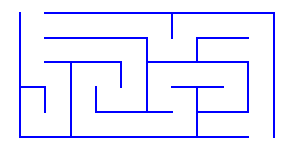

In [0]:
M = random_maze(10, 5)
plot_maze(M, figsize=(5, 2.5))  

---

# A labirintus megoldása

Itt az ideje megmutatni, hogyan lehet megoldani egy labirintust. 

Az első szélességű keresést fogom használni, amely garantálja, hogy a megoldás a lehető legrövidebb lesz (bár csak egy megoldással rendelkező labirintusok esetén).

A `breadth_first_search` függvény a fel nem fedezett négyzetek határát tartja fenn, és minden iterációnál eltávolítja a határról egy négyzetet, amely a legkisebb útmélységben van, és hozzáadja a határhoz a négyzet összes szomszédját, amelyeket a falak nem blokkolnak és még nem láttak korábban.

A `{square: [square,...]}` elérési útnak nevezett szótárnak két célja van: megakadályozza, hogy hurkokat hozzunk létre egy útban, és végül megmondja nekünk az utat az indulástól a célig, pl. `[(0, 0), (0, 1), (1, 1), (2, 1), ...]`.

---

In [0]:
def breadth_first_search(maze):
    """Find a shortest sequence of states from start to the goal."""
    start = (0, 0)
    goal = (maze.width - 1, maze.height - 1)
    frontier = deque([start])  # A queue of states to consider
    paths = {start: [start]}   # start has a one-square path
    while frontier:
        s = frontier.popleft()
        if s == goal:
            return paths[s]
        for s2 in neighbors4(s):
            if s2 not in paths and edge(s, s2) in maze.edges:
                frontier.append(s2)
                paths[s2] = paths.get(s, []) + [s2]

In [0]:
solution = breadth_first_search(M)
solution

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (5, 1),
 (6, 1),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4)]

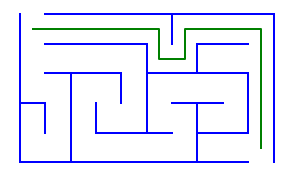

In [0]:
plot_maze(M, figsize=(5, 3), path=solution)

---

# Stratégiak `pop` paraméter `random_maze` használathoz

Hasonlítsuk össze, hogy a labirintus hogyan változik a pop-paraméter három különböző választása alapján.


# `pop=deque.pop`


Az alapértelmezett pop módszer, a `deque.pop` azt jelenti, hogy a fát ** mélységében először ** hozza létre; mindig a `node` a határ ** ** végén ** választjuk, tehát a fa egy ágot követ véletlenszerűen csavart út mentén, amíg az út megduplázódik, és nincs több szomszéd. 

Ezen a ponton kiválasztjuk a legújabb teret, amelyhez szomszédok vannak, és onnan folytatjuk. A `deque.pop`  labirintus nagyon jól néz ki.

Megmutatom a labirintust megoldás nélkül, majd a megoldás útvonalával.

---

In [0]:
def show(pop):
    """Using this `pop` parameter, show a 70x70 maze, first without and then with the solution path."""
    M = random_maze(30, 30, pop)
    plot_maze(M)
    plt.show()
    solution = breadth_first_search(M)
    plot_maze(M, path=[(0, -1)] + solution + [(M.width - 1, M.height)])
    return len(solution)

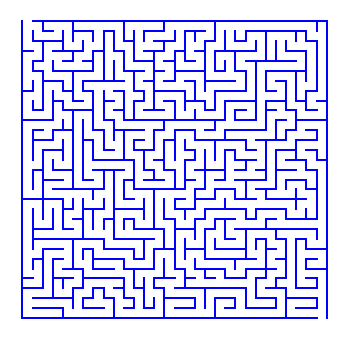

339

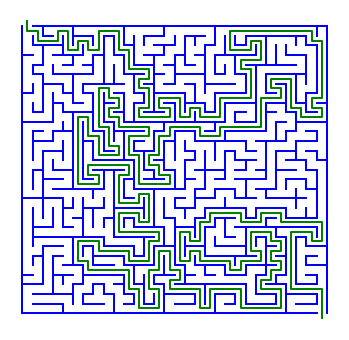

In [0]:
show(deque.pop)

---

# `pop=deque.popleft`

Ez nagyjából ugyan olyan szélességgel hozza létre a labirintust - egy gyökér négyzetnél indulunk, hozzá adunk egy szélt, és ettől kezdve mindig kiválasztunk egy szülői élt, mielőtt kiválasztunk egy gyermek élét.

A nettó eredmény egy olyan terv, amely koncentrikus rétegekben sugároz ki a gyökérből (amelyet a `random_tree` választ ki, és nem feltétlenül a bal felső négyzet; alatta úgy tűnik, hogy a gyökér a jobb alsó negyedben található). 

A `deque.popleft` labirintus formatervezésként érdekes, de számomra nem működik jól, mint egy labirintus. Túl könnyű megoldani: kövesse az utat a kezdetektől a gyökérig, majd fontolja meg az utat a végétől a gyökérig, és nézze meg, hogy miként illeszkednek egymáshoz.

---

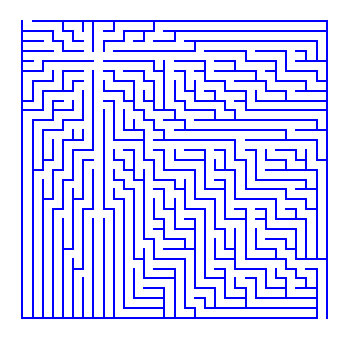

59

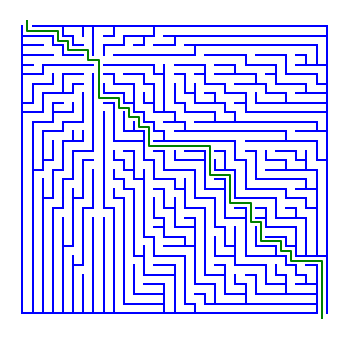

In [0]:
show(deque.popleft)

# `pop=poprandom`

Választhatunk egy cellát véletlenszerűen a határtól. 

Ez egy érdekes kompromisszum: van némi felépítése és véleményem szerint meglehetősen szép, mint labirintus. 


Meg kell azonban mondanom, hogy meglepett, hogy az út majdnem olyan egyenes és rövid, mint a `pop=popleft` esetében; nem olyan szűk, mint a `pop=deque.pop`-nál.

---

In [0]:
def poprandom(seq):
    """Select and return a random element; remove it from the sequence."""
    element = random.choice(seq)
    seq.remove(element)
    return element

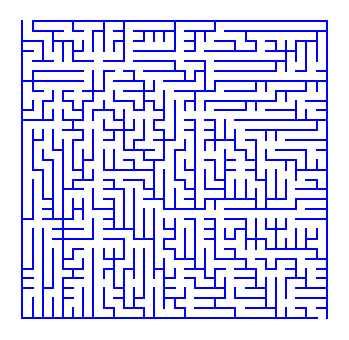

65

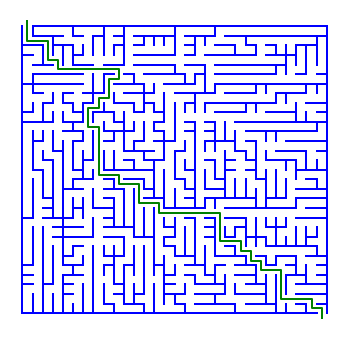

In [0]:
show(poprandom)